In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Set style for charts
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Load the CSV file (update the path if needed)
df = pd.read_csv(r"C:\Users\Varun\Downloads\sample_transaction_data.csv")

In [15]:
# Preview the first 5 rows
print(" Preview of the dataset:")
display(df.head())

 Preview of the dataset:


,transaction_id,customer_id,amount,channel,location,txn_time,is_foreign,is_high_risk_country,is_fraud
0,T1,C145,58578.12,POS,Delhi,2023-07-05 16:59:00,0,0,0
1,T2,C147,124919.02,ATM,Kolkata,2023-05-28 04:12:00,1,0,0
2,T3,C191,106866.02,Mobile,Mumbai,2023-06-25 01:55:00,0,1,0
3,T4,C146,84469.88,ATM,Mumbai,2023-06-11 17:59:00,0,1,1
4,T5,C135,99253.20,ATM,Bangalore,2023-06-21 02:32:00,0,0,1


In [17]:
# Dataset info
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        500 non-null    object 
 1   customer_id           500 non-null    object 
 2   amount                500 non-null    float64
 3   channel               500 non-null    object 
 4   location              500 non-null    object 
 5   txn_time              500 non-null    object 
 6   is_foreign            500 non-null    int64  
 7   is_high_risk_country  500 non-null    int64  
 8   is_fraud              500 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 35.3+ KB

Missing values in each column:
transaction_id          0
customer_id             0
amount                  0
channel                 0
location                0
txn_time                0
is_foreign              0
is_high_risk_country    0
is_fraud                0
dtype:

In [19]:
# Convert 'is_fraud' to string for coloring
df['is_fraud'] = df['is_fraud'].astype(str)


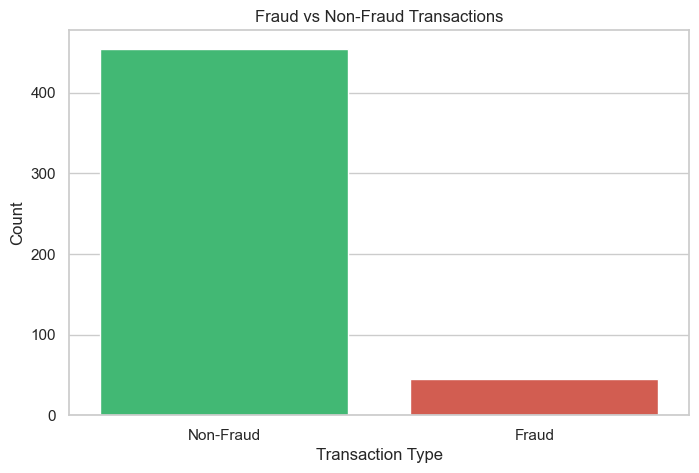

In [23]:
# Fraud vs Non-Fraud
df['is_fraud'] = df['is_fraud'].astype(str)

# Use hue + legend=False as Seaborn suggests
sns.countplot(data=df, x='is_fraud', hue='is_fraud', palette={'0': '#2ecc71', '1': '#e74c3c'}, legend=False)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])  # Custom labels
plt.show()

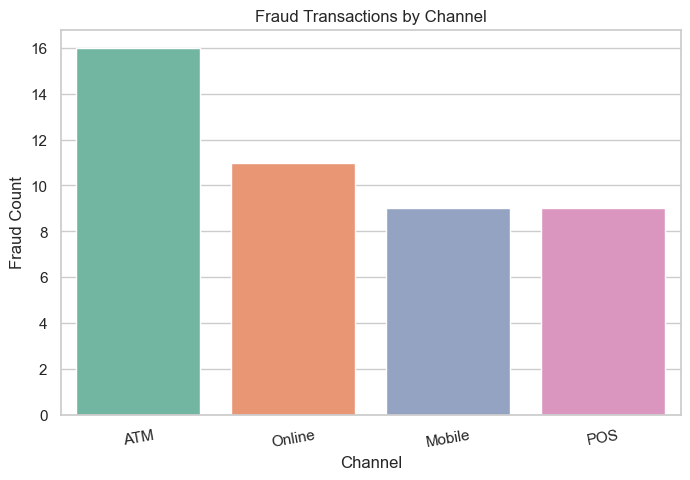

In [27]:
#Fraud Transactions by Channel
# Make sure fraud_df has 'is_fraud' as string (to avoid palette issues)
fraud_df = df[df['is_fraud'] == '1'].copy()

# Assign hue to the same column and turn off legend (per Seaborn warning)
sns.countplot(data=fraud_df, x='channel', hue='channel', palette='Set2', legend=False)
plt.title('Fraud Transactions by Channel')
plt.xlabel('Channel')
plt.ylabel('Fraud Count')
plt.xticks(rotation=10)
plt.show()

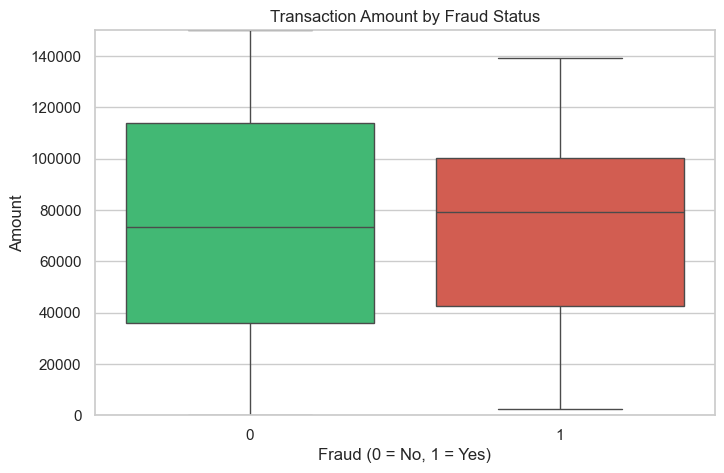

In [31]:
# Amount by Fraud
# Make sure 'is_fraud' is string (for consistent color mapping)
df['is_fraud'] = df['is_fraud'].astype(str)

# Boxplot with hue to avoid future warning
sns.boxplot(data=df, x='is_fraud', y='amount', hue='is_fraud', palette={'0': '#2ecc71', '1': '#e74c3c'}, legend=False)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Amount')
plt.ylim(0, 150000)
plt.show()

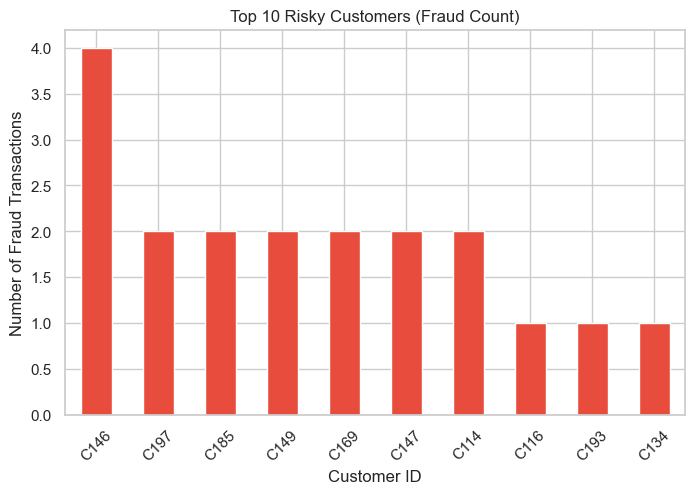

In [33]:
# Top Customers with Most Fraud Cases
fraud_df = df[df['is_fraud'] == '1']

# Count frauds per customer
top_customers = fraud_df['customer_id'].value_counts().head(10)

# Plot
top_customers.plot(kind='bar', color='#e74c3c')
plt.title('Top 10 Risky Customers (Fraud Count)')
plt.xlabel('Customer ID')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()